In [8]:
import cv2, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def draw_grid(img, line_color=(0, 255, 0), thickness=1, type_=cv2.LINE_AA, pxstep=70):
    x,y,c = 0,0,0
    print(img.shape)
    while y < img.shape[0]:
        while x < img.shape[1]:
            crop_img = img[y:y+pxstep, x:x+pxstep]
            cv2.imwrite('intermediate/'+str(c)+'.jpg',crop_img)
            x += pxstep
            c += 1
        y += pxstep
        x = 0

(167, 583, 3)


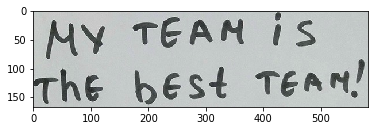

In [4]:
img = cv2.imread('input/test2.jpg')
draw_grid(img)
plt.imshow(img)

In [5]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from datetime import timedelta
import collections

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [11]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('saved_models/hcr_linear_acc_91_3.meta')
    saver.restore(sess=sess, save_path='saved_models/hcr_linear_acc_91_3')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from saved_models/hcr_linear_acc_91_3


In [ ]:
#Prepare to feed input, i.e. feed_dict and placeholders
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

feed_dict ={w1:4,w2:8}
 
#Define a test operation that we will restore
w3 = tf.add(w1,w2)
w4 = tf.multiply(w3,b1,name="op_to_restore")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
#Create a saver object which will save all the variables
saver = tf.train.Saver()
 
#Run the operation by feeding input
print sess.run(w4,feed_dict)
#Prints 24 which is sum of (w1+w2)*b1 
 
#Now, save the graph
saver.save(sess, 'my_test_model',global_step=1000)

In [76]:
img = cv2.imread('input/test3.jpg',cv2.IMREAD_GRAYSCALE)

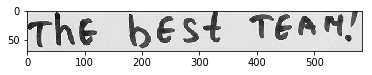

In [81]:
plt.imshow(img,cmap='Greys_r')

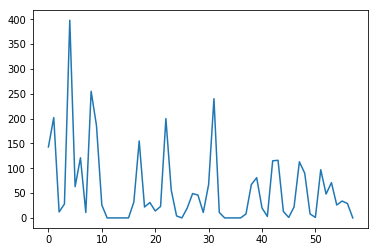

In [75]:
# plt.imshow(img[0:img.shape[0],0:10],cmap='Greys_r')
x, x_proj = 10, []
while x < img.shape[1]:
    a = img[0:img.shape[1],x:x+10].ravel()
    c = ((30 <= a) & (a <= 70)).sum()
    x_proj.append(c)
    x += 10
plt.plot(x_proj)

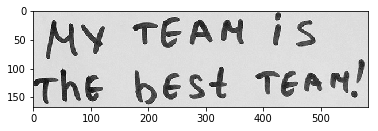

In [82]:
img2 = cv2.imread('input/test2.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img2,cmap='Greys_r')

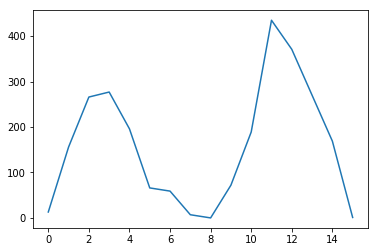

In [78]:
y, y_proj = 10, []
while y < img2.shape[0]:
    a = img2[y:y+10, 0:img2.shape[0]].ravel()
    c = ((30 <= a) & (a <= 70)).sum()
    y_proj.append(c)
    y += 10
plt.plot(y_proj)
